# Midterm 
- Predict Galaxy/Star using Classification algorithms
- Our data comes from the <a href="https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17" target="_blank"> Stellar Classification Data set </a> witch contains stars, galaxies, and quasars based on their spectral characteristics.

## Prepare Workspace:

In [1]:
pip install statsmodels sklearn

In [2]:
pip install pypi

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import seaborn as sns
import warnings
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve
from sklearn.decomposition import PCA 
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.preprocessing import StandardScaler, scale 
from sklearn import linear_model 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import GridSearchCV
from numpy.linalg import svd
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
warnings.filterwarnings('ignore')

## Import data/ Check data: 

In [17]:
dfo=pd.read_csv('star_classification.csv')

In [6]:
dfo.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [7]:
##Check for missing data 
# uses a boolean statment to check for missing data 
print(dfo.isnull().values.any())

False


In [8]:
##Check for missing data 
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [9]:
#number of observations for each class 
dfo['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [10]:
"""
Here we checked for missing data and then looked at how many observations were in each class. There are 59445 observations for galazy,
21594 for star and 18961 for quasar.
"""

'\nHere we checked for missing data and then looked at how many observations were in each class. There are 59445 observations for galazy,\n21594 for star and 18961 for quasar.\n'

## Data Exploration and Visualization: 
<a href="https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17" target="_blank"> Stellar Classification Dataset SDSS17 from kaggel</a> 

**Got some information on the data and Astronomy:**
- <a href="https://www.sdss.org/dr12/spectro/spectro_basics/" target="_blank"> Understanding SDSS spectroscopic data </a> 
- https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectra_astro_types.html
- https://www.aanda.org/articles/aa/full_html/2021/01/aa38986-20/aa38986-20.html


### **Feature Infomation**:


`spec_obj_ID` = Unique ID used for optical spectroscopic objects (this means that 2 different observations with  the same spec_obj_ID must share the output class)

`obj_ID` = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

**location in the sky** 

`alpha` = Right Ascension angle (at J2000 epoch)

`delta` = Declination angle (at J2000 epoch)

**The spectra** 

`u` = Ultraviolet filter in the photometric system

`g` = Green filter in the photometric system

`r` = Red filter in the photometric system

`i` = Near Infrared filter in the photometric system

`z` = Infrared filter in the photometric system

`redshift` = redshift value based on the increase in wavelength

**Image collection Information** 

`run_ID` = Run Number used to identify the specific scan

`rereun_ID` = Rerun Number to specify how the image was processed

`cam_col` = Camera column to identify the scanline within the run

`field_ID` = Field number to identify each field

`plate` = plate ID, identifies each plate in SDSS, Integer that idicating what plate was used to take the image.

`MJD` = Modified Julian Date, used to indicate when a given piece of SDSS data was taken. 

`fiber_ID` = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation



**Target variable**


`class` = object class (galaxy, star or quasar object)

In [11]:
#create a data frame for visualizations based on dfo 
# needed some data that wasnt scaled 

dummy = pd.get_dummies(dfo['class'], prefix='class')

# add new dataframe to the existing one 
dfo = dfo.join(pd.DataFrame(
    {
        'Galaxy': dummy["class_GALAXY"],
        'Quasar': dummy["class_QSO"],
        'Star': dummy['class_STAR']
    }, index=dfo.index
))
dfv= dfo[dfo['Quasar'] == 0] #new data set for visulaizations

In [12]:
dfv = dfv.drop(columns=['class', 'Quasar', 'rerun_ID', 'obj_ID', 'Star'])
# Drop un-necesary columns (reasoning is writen below) 

# class is non-numerical and has been converted into dummys 
# Quasar is no longer needed for our classification problem 
# rerun_ID contains no usefull information(see orginal data )
# obj_ID is an indexing feature with no relevent information 
# Star contains the same information as Galaxy  

In [13]:
#reset df index and view the df 
dfv = dfv.reset_index(drop=True)

In [14]:
# Split the data because some of the plots where taking a very long time to load 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=1)
for train_indices, test_indices in split.split(dfv,dfv['Galaxy']):
    train_vis = dfv.loc[train_indices]
    test_vis = dfv.loc[test_indices]

In [13]:
# data for visualization
train_vis.describe()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,Galaxy
count,72935.000000,72935.000000,72935.000000,72935.000000,72935.000000,72935.000000,72935.000000,72935.000000,72935.000000,72935.000000,7.293500e+04,72935.000000,72935.000000,72935.000000,72935.000000,72935.000000
mean,176.771118,23.521101,22.203748,20.561773,19.416201,18.769067,18.418036,4457.201974,3.509742,188.242024,5.306493e+18,0.309068,4713.004826,55344.462000,439.424433,0.733530
std,95.896563,19.625232,2.375078,2.186032,1.922178,1.737690,1.709913,1951.368978,1.590778,152.698576,3.183747e+18,0.293384,2827.718309,1772.957098,268.543440,0.442116
min,0.005528,-18.785328,12.262400,10.511390,9.822070,9.469903,9.612333,109.000000,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000,0.000000
25%,127.073944,4.631176,20.233155,18.590225,17.723850,17.325745,17.060415,3180.000000,2.000000,82.000000,2.520960e+18,0.000313,2239.000000,53848.000000,215.000000,0.000000
50%,179.698615,22.558225,22.491340,21.124270,19.809280,19.056340,18.659500,4192.000000,4.000000,147.000000,5.104837e+18,0.247277,4534.000000,55656.000000,421.000000,1.000000
75%,233.215326,38.777225,23.949755,22.265310,20.888055,19.963160,19.513655,5322.000000,5.000000,242.000000,7.584150e+18,0.542521,6736.000000,56486.000000,627.000000,1.000000
max,359.999810,83.000519,30.660390,31.602240,29.571860,30.250090,29.383740,8162.000000,6.000000,989.000000,1.412693e+19,1.995524,12547.000000,58932.000000,1000.000000,1.000000


In [14]:
from patsy import dmatrices
y, X = dmatrices('Galaxy~ alpha+delta+u+g+r+i+z+cam_col+redshift+field_ID+plate+MJD', train_vis,return_type = 'dataframe')

#calculate Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
display(vif_scores)

,Attribute,VIF Scores
0,Intercept,15093.220434
1,alpha,1.057003
2,delta,1.077606
3,u,4.595140
4,g,21.551436
5,r,44.602283
6,i,44.065369
7,z,19.762174
8,cam_col,1.003094
9,redshift,2.112920


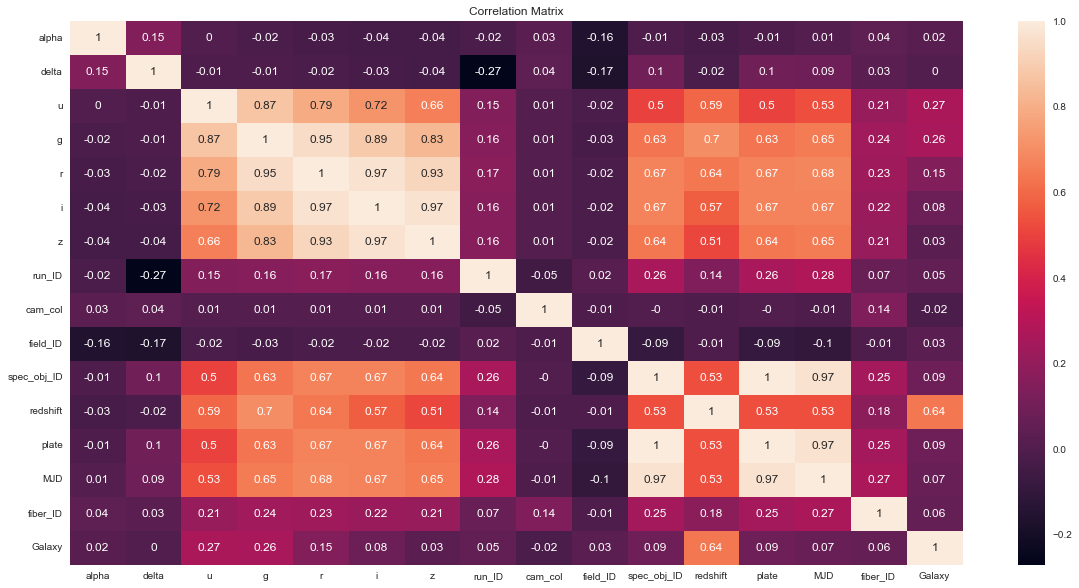

In [15]:
#Dropped rerun_ID , obj_ID, and Star because they dont contain use-full information
CorrelationMatrix = train_vis.corr().round(2)
plt.figure(figsize= (20, 10)) #(width,hight)
plt.title('Correlation Matrix')
sns.heatmap(data= CorrelationMatrix,annot=True)
plt.show()

### Visualizing The light Spectra:
1. The density plots for the light spectra given all of the unscaled trainig data 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


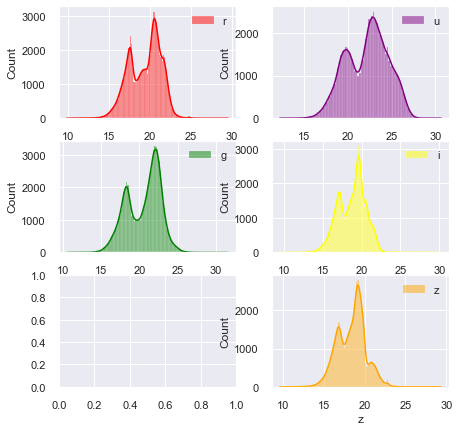

In [16]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(7, 7))

sns.histplot(data=train_vis, x="r", color="red", label="r", kde=True, ax=axs[0, 0])
sns.histplot(data=train_vis, x="g", color="green", label="g", kde=True, ax=axs[1, 0])
sns.histplot(data=train_vis, x="u", color="Purple", label="u", kde=True, ax=axs[0, 1])
sns.histplot(data=train_vis, x="i", color="yellow", label="i", kde=True, ax=axs[1, 1])
sns.histplot(data=train_vis, x="z", color="orange", label="z", kde=True, ax=axs[2, 1])
for ax in axs.ravel():
    ax.legend()
plt.show()

## Visualizing Redshift: 
Redshift is our most important variable 
1. box plot of the redshift for stars and galxaies
2. The density of the redshift for the whole data set 
3. The densitys of redshift for stars and galaxies on the same plot 
    - The redshift for stars is so dense around 0 that its almost impossible to see the redshift for galaxies that is spread out from 0 to 2. So to get a better idea plot 4. shows just stars and plot 5 shows just galaxies. 
4. density of redshift on just stars 
5. density of redshift on just galaxies 


In [17]:
#create data frames for plotting 
redshiftG = train_vis[train_vis['Galaxy'] == 0]
redshiftS = train_vis[train_vis['Galaxy'] == 1]

In [18]:
print('Redshift for Stars\n', redshiftG['redshift'].describe())
print('Redshift fot Galaxies\n',redshiftS['redshift'].describe())

Redshift for Stars
 count    19435.000000
mean        -0.000115
std          0.000467
min         -0.004136
25%         -0.000296
50%         -0.000077
75%          0.000075
max          0.004153
Name: redshift, dtype: float64
Redshift fot Galaxies
 count    53500.000000
mean         0.421385
std          0.264576
min         -0.009971
25%          0.164205
50%          0.456323
75%          0.594711
max          1.995524
Name: redshift, dtype: float64


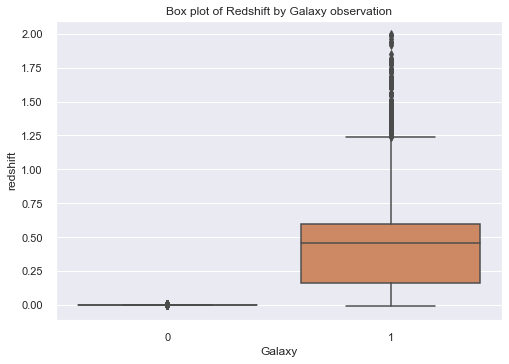

In [19]:
 # Boxplots 
sns.set(style="darkgrid")
sns.boxplot(data=train_vis, x='Galaxy', y='redshift')
plt.title('Box plot of Redshift by Galaxy observation')
plt.show()

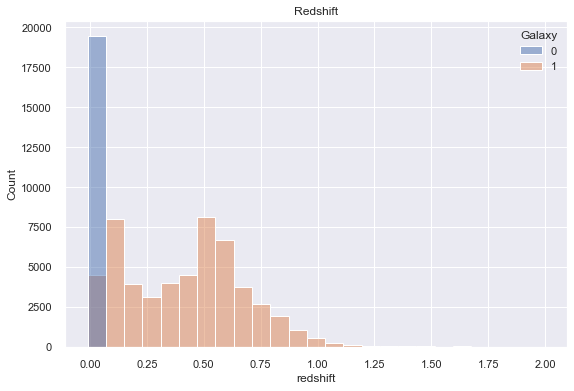

In [21]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "redshift",
             data=train_vis,
              bins=25,
              hue="Galaxy",
              kde=False)
plt.title('Redshift')
plt.show()

# Data prep 
1. Create dummy variables for the responce*  
2. Drop the Quasar observations from the dataframe*  
3. Reset the df index in prepration of the stratified training and test split*  

In [18]:
# create dummy variables for the responce variable, encoded as 1=true and 0=false
# each category gets its own column 
# a new dataframe was created only containing the responce variables 
responce = pd.get_dummies(dfo['class'], prefix='class')
responce 

,class_GALAXY,class_QSO,class_STAR
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
99995,1,0,0
99996,1,0,0
99997,1,0,0
99998,1,0,0


In [19]:
# add new dataframe to the existing one 
dfo = dfo.join(pd.DataFrame(
    {
        'Galaxy': responce["class_GALAXY"],
        'Quasar': responce["class_QSO"],
        'Star': responce['class_STAR']
    }, index=dfo.index
))

In [20]:
dfo

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,...,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,Galaxy,Quasar,Star
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,...,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,1,0,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,...,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,1,0,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,...,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,1,0,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,...,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,1,0,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,...,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,...,581,1.055431e+19,GALAXY,0.000000,9374,57749,438,1,0,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,...,289,8.586351e+18,GALAXY,0.404895,7626,56934,866,1,0,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,...,308,3.112008e+18,GALAXY,0.143366,2764,54535,74,1,0,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,...,131,7.601080e+18,GALAXY,0.455040,6751,56368,470,1,0,0


In [21]:
#drop all observations where a quasar is seen 
dfo = dfo[dfo['Quasar'] == 0]

In [22]:
#double check that the process worked
dfo['class'].value_counts()

GALAXY    59445
STAR      21594
Name: class, dtype: int64

In [23]:
#drop un-necesary columns 
dfo = dfo.drop(columns=['class', 'Quasar','Star'])

In [24]:
#reset df index and view the df 
dfo = dfo.reset_index(drop=True)
dfo

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,Galaxy
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,1
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81034,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,1
81035,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,1
81036,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,1
81037,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,1


In [25]:
#Detect Outliers 
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(dfo) 
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score
threshold2 = -3                                            
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()
len(outlier_index)

6187

In [26]:
#Drop outliers 
dfo.drop(outlier_index, inplace=True)

In [ ]:
"""
A new dataframe was added where galaxy, star and quasar are all response variables. All observations for quasar were then dropped as well as
unncessary columns which were: class, quasar and star. Then, 11575 outliers were detected using a threshold of -1.5. These outliers were then
dropped which made the total observations after dropping both quasar and the outliers turn out to 69,464.
"""

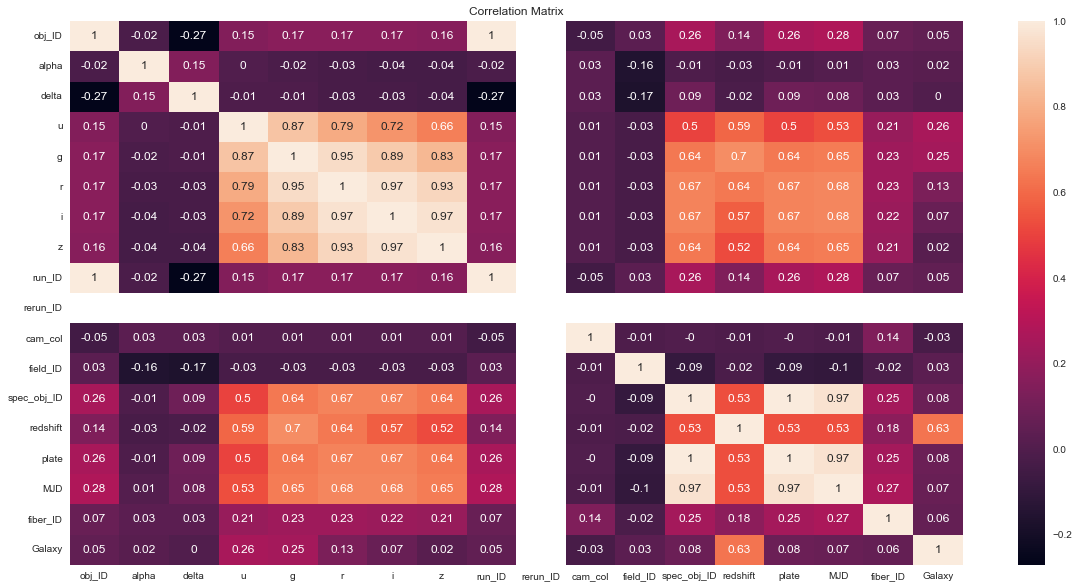

In [19]:
#check multicollinearity
CorrelationMatrix = dfo.corr().round(2)
plt.figure(figsize= (20, 10)) #(width,hight)
plt.title('Correlation Matrix')
sns.heatmap(data= CorrelationMatrix,annot=True)
plt.show()

In [20]:
corr=dfo.corr()
corr["Galaxy"].sort_values()

cam_col       -0.033525
delta          0.000808
z              0.018705
alpha          0.020109
field_ID       0.028314
obj_ID         0.046324
run_ID         0.046327
fiber_ID       0.055189
i              0.066778
MJD            0.067455
plate          0.082958
spec_obj_ID    0.082959
r              0.134526
g              0.247897
u              0.255121
redshift       0.628167
Galaxy         1.000000
rerun_ID            NaN
Name: Galaxy, dtype: float64

In [27]:
df = dfo.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [28]:
#transform the data using standard scaler. this will normalise and center the data around zero
from sklearn.preprocessing import StandardScaler

Y = df['Galaxy']
X = df.drop(['Galaxy'],axis=1)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), index=X.index, columns=X.columns)
Y_data = Y.to_numpy()
df = X
df['Galaxy'] = Y_data
df.reset_index(drop=True)

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,Galaxy
0,0.697326,0.774785,0.500933,0.220115,0.213108,0.376804,1.095904,0.376829,0.559617,1
1,1.076911,1.030111,1.643614,1.376044,1.867630,2.006428,1.586803,2.006441,1.572096,1
2,1.281948,0.953047,0.613012,0.325664,0.303772,-0.057933,1.127876,-0.057922,0.131951,1
3,-0.038388,1.463476,1.135891,0.992976,0.480823,1.550606,2.107859,1.550586,1.505308,1
4,-1.178550,-1.379018,-1.533225,-1.620594,-1.692793,0.485549,-0.668062,0.485517,0.465889,1
...,...,...,...,...,...,...,...,...,...,...
74847,-0.025393,1.096161,1.288508,1.455339,1.352261,1.629718,-1.062987,1.629728,1.342548,1
74848,0.195740,0.825696,0.529648,0.561781,0.577705,1.014916,0.314034,1.014886,0.885136,1
74849,-0.447068,-0.603887,-0.642427,-0.631590,-0.632467,-0.695302,-0.575410,-0.695275,-0.461281,1
74850,1.318826,0.482231,0.249817,0.166319,0.114038,0.707112,0.484572,0.707113,0.567474,1


In [29]:
#reset df index and view the df 
df = df.reset_index(drop=True)
df

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,Galaxy
0,0.697326,0.774785,0.500933,0.220115,0.213108,0.376804,1.095904,0.376829,0.559617,1
1,1.076911,1.030111,1.643614,1.376044,1.867630,2.006428,1.586803,2.006441,1.572096,1
2,1.281948,0.953047,0.613012,0.325664,0.303772,-0.057933,1.127876,-0.057922,0.131951,1
3,-0.038388,1.463476,1.135891,0.992976,0.480823,1.550606,2.107859,1.550586,1.505308,1
4,-1.178550,-1.379018,-1.533225,-1.620594,-1.692793,0.485549,-0.668062,0.485517,0.465889,1
...,...,...,...,...,...,...,...,...,...,...
74847,-0.025393,1.096161,1.288508,1.455339,1.352261,1.629718,-1.062987,1.629728,1.342548,1
74848,0.195740,0.825696,0.529648,0.561781,0.577705,1.014916,0.314034,1.014886,0.885136,1
74849,-0.447068,-0.603887,-0.642427,-0.631590,-0.632467,-0.695302,-0.575410,-0.695275,-0.461281,1
74850,1.318826,0.482231,0.249817,0.166319,0.114038,0.707112,0.484572,0.707113,0.567474,1


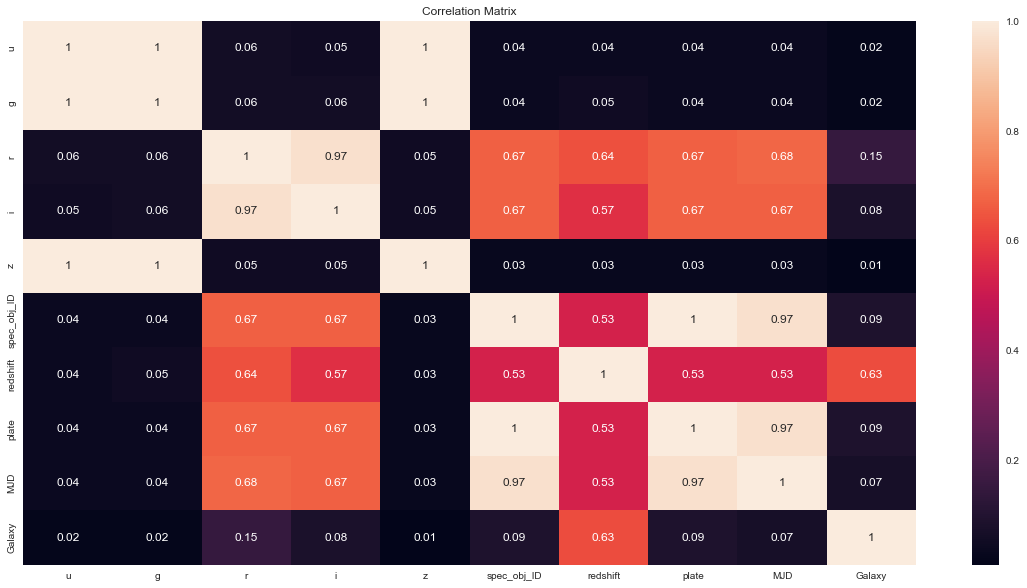

In [20]:
#check multicollinearity after drop 
CorrelationMatrix = df.corr().round(2)
plt.figure(figsize= (20, 10)) #(width,hight)
plt.title('Correlation Matrix')
sns.heatmap(data= CorrelationMatrix,annot=True)
plt.show()

In [ ]:
"""
A correlation heatmap was used to check for colinearity between variables. After looking at this heatmap, the variables obj_ID','alpha','delta',
'run_ID','rerun_ID','cam_col','field_ID','fiber_ID' were all dropped. There was colinearity between these variables and so they were dropped.
A standard scaler was then used to normalize the data around zero. After the drop, another heatmap was created to check correlation again.
"""


# Split data into Train/validation and test 

In [30]:
#preform train/validation and test split 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=1)
for train_validation_indices, test_indices in split.split(df,df['Galaxy']):
    strat_train_validation = df.loc[train_validation_indices]
    strat_test = df.loc[test_indices]

In [31]:
strat_train_validation=strat_train_validation.reset_index(drop=True)

In [23]:
strat_train_validation

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,Galaxy
0,-0.040403,-0.045205,-0.897341,-0.879775,-0.039672,-0.688631,-0.480066,-0.688615,-0.609776,1
1,0.120193,0.046828,0.641149,0.458840,0.021074,0.497282,0.842045,0.497263,0.485547,1
2,-0.069027,-0.072539,-1.226420,-1.216538,-0.054037,-1.421657,-0.906288,-1.421652,-1.769995,1
3,0.048526,0.031567,0.264507,0.193094,0.008243,0.066019,0.543420,0.066002,0.206214,1
4,-0.112573,-0.112916,-1.944004,-2.031779,-0.096376,-1.164092,-0.890254,-1.164099,-1.373286,1
...,...,...,...,...,...,...,...,...,...,...
72930,0.055379,0.063306,0.838664,0.698557,0.037154,-0.301914,0.729361,-0.301931,-0.040389,1
72931,0.071055,0.058694,0.705888,0.503177,0.020267,0.055001,0.850043,0.055035,0.325848,1
72932,0.028103,0.050402,0.684435,0.619221,0.030640,-0.295574,0.480045,-0.295563,-0.057318,1
72933,0.079300,0.041432,0.412951,0.285625,0.014104,-0.147696,0.705695,-0.147682,0.259823,1


In [32]:
strat_test=strat_test.reset_index(drop=True)

In [25]:
strat_test

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,Galaxy
0,0.068435,0.091449,1.729725,1.506555,0.046192,1.301758,1.556058,1.301763,1.421735,1
1,-0.075714,-0.025167,0.297537,0.862594,0.080117,-1.437912,-1.054238,-1.437926,-1.807240,0
2,0.118196,0.031165,0.275746,0.117817,0.004795,0.103180,0.690308,0.103149,0.203393,1
3,-0.047317,-0.055895,-0.997144,-0.963798,-0.045171,-1.340616,-0.569679,-1.340636,-1.656005,1
4,0.061937,0.035052,0.506260,0.474367,0.023511,-0.063137,0.903632,-0.063128,0.288603,1
...,...,...,...,...,...,...,...,...,...,...
8099,-0.057109,-0.046629,-0.608342,-0.410900,-0.010159,1.266055,-1.053550,1.266031,1.137324,0
8100,0.018635,0.042301,0.305509,0.175799,0.007331,-0.120115,0.729342,-0.120087,0.306661,1
8101,-0.088137,-0.068428,-0.879873,-0.724052,-0.026307,-1.148883,-0.853483,-1.148886,-1.258731,1
8102,0.142267,0.028545,0.181463,-0.028499,-0.004402,0.023179,0.729342,0.023194,0.189849,1


In [ ]:
"""
Next, we split the data into a train/validation and test set. There are 62517 observations in the training set and 6946 observations in 
the test set.
"""

# Split train/validation into 80% train and 20% validation

In [33]:
#preform train and validation split 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=1)
for train_indices, validation_indices in split.split(strat_train_validation,strat_train_validation['Galaxy']):
    strat_train = df.loc[train_indices]
    strat_validation = df.loc[validation_indices]

In [27]:
strat_train

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,Galaxy
50769,-0.043839,-0.011797,-0.041542,-0.303077,-0.021941,-1.225994,-1.053008,-1.226010,-0.486193,0
52728,-0.075575,-0.075095,-1.184419,-1.061390,-0.041746,-0.545319,-1.053372,-0.545333,-0.280220,0
9177,0.037678,0.005497,0.243184,0.508099,0.032721,1.232414,-1.052928,1.232422,1.144660,0
52451,-0.069003,-0.061109,-0.932442,-0.889137,-0.039169,-1.573412,-0.734646,-1.573424,-2.109145,1
59598,-0.038953,-0.051596,-1.086567,-1.117345,-0.050954,-1.154574,-0.417228,-1.154546,-1.257603,1
...,...,...,...,...,...,...,...,...,...,...
29897,-0.021450,-0.004372,0.445611,0.910674,0.057335,-0.734247,-1.053923,-0.734253,-0.693858,0
39139,-0.008635,-0.001654,-0.216262,-0.156611,-0.004960,-1.090493,-0.005648,-1.090512,-1.325884,1
7413,-0.075116,-0.064300,-1.051133,-1.033536,-0.044307,-0.917882,-0.444241,-0.917866,-0.842836,1
34157,0.059569,0.055718,0.222975,0.153403,0.008635,-0.733879,0.211747,-0.733899,-0.491836,1


In [28]:
strat_validation

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,Galaxy
1042,0.017792,0.053363,0.645666,0.536673,0.026367,0.610445,0.670617,0.610473,0.578094,1
30787,-0.081483,-0.074856,-1.212272,-1.176300,-0.051867,-1.151727,-0.814940,-1.151716,-1.257603,1
44083,-0.011274,-0.025236,-0.530455,-0.536404,-0.023131,-0.760453,-1.053461,-0.760433,-0.573661,0
26117,-0.016801,0.007236,0.509460,0.861190,0.047502,-0.332350,-1.052891,-0.332357,-0.078198,0
29671,-0.060375,-0.042269,-0.391003,-0.138118,0.005205,0.101357,-1.056468,0.101380,0.210729,0
...,...,...,...,...,...,...,...,...,...,...
61841,0.095156,0.101185,1.340803,1.163535,0.045680,1.342064,1.518722,1.342094,1.410449,1
28979,0.111328,0.063344,1.257697,1.213140,0.069795,1.669012,1.444812,1.668989,1.554348,1
29768,0.022210,0.033255,0.425267,0.360586,0.017497,0.270506,0.520185,0.270488,0.378328,1
4200,-0.052596,-0.026939,-0.355626,-0.125781,-0.000616,-1.055819,0.081787,-1.055841,-1.042601,1


###  Build two matrices for training dataset and validation dataset

In [39]:
y_train, X_train = dmatrices('Galaxy~u+g+r+i+z+spec_obj_ID+redshift+plate+MJD', strat_train, return_type = 'dataframe')
y_validation, X_validation = dmatrices('Galaxy~u+g+r+i+z+spec_obj_ID+redshift+plate+MJD', strat_validation, return_type = 'dataframe')

In [30]:
print(y_train)

       Galaxy
50769     0.0
52728     0.0
9177      0.0
52451     1.0
59598     1.0
...       ...
29897     0.0
39139     1.0
7413      1.0
34157     1.0
53346     1.0

[58348 rows x 1 columns]


In [31]:
print(X_validation.iloc[:,1:10])

              u         g         r         i         z  spec_obj_ID  \
1042   0.017792  0.053363  0.645666  0.536673  0.026367     0.610445   
30787 -0.081483 -0.074856 -1.212272 -1.176300 -0.051867    -1.151727   
44083 -0.011274 -0.025236 -0.530455 -0.536404 -0.023131    -0.760453   
26117 -0.016801  0.007236  0.509460  0.861190  0.047502    -0.332350   
29671 -0.060375 -0.042269 -0.391003 -0.138118  0.005205     0.101357   
...         ...       ...       ...       ...       ...          ...   
61841  0.095156  0.101185  1.340803  1.163535  0.045680     1.342064   
28979  0.111328  0.063344  1.257697  1.213140  0.069795     1.669012   
29768  0.022210  0.033255  0.425267  0.360586  0.017497     0.270506   
4200  -0.052596 -0.026939 -0.355626 -0.125781 -0.000616    -1.055819   
23713 -0.048830 -0.054032 -1.045508 -1.053479 -0.048398    -1.495939   

       redshift     plate       MJD  
1042   0.670617  0.610473  0.578094  
30787 -0.814940 -1.151716 -1.257603  
44083 -1.053461 -0.76

In [ ]:
"""
We built a stratified training set consisting of 50013 observations and a validation set consisting of 12504 observations. This was an 80% 
training split and a 20% validation split.
"""

### Logistic Regression 

In [99]:
logit=sm.Logit(y_train,X_train.iloc[:,1:10])
print(logit.fit().summary())

         Current function value: 2.844084
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Galaxy   No. Observations:                50013
Model:                          Logit   Df Residuals:                    50004
Method:                           MLE   Df Model:                            8
Date:                Thu, 27 Oct 2022   Pseudo R-squ.:                  -3.930
Time:                        14:11:11   Log-Likelihood:            -1.4224e+05
converged:                      False   LL-Null:                       -28851.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
u               2.8127      0.100     28.188      0.000       2.617       3.008
g              14.0409      0.359     39.164      0.000      1

In [100]:
# Fit validation data into logistic model
preds=logit.fit().predict(X_validation.iloc[:,1:10])
predict_label_logistic = pd.DataFrame(np.zeros(shape=(X_validation.shape[0],1)), columns = ['label'])
threshold=0.5
mark=(preds>threshold).reset_index(drop=True)
predict_label_logistic.loc[mark]=1

         Current function value: 2.844084
         Iterations: 35


In [ ]:
"""
We built a logistic regression consisting of all of the variables that were not dropped prebiously. Most of the coefficients were positive but
the coefficients for r, spec_obj_ID and MDJ were all negative. The variable u has the lowest standard at 0.100 and plate and spec_obj_ID have
high standard errors at 11400. With this regression, only 59% of observations can be perfectly predicted which is just a little over half, so 
we would definitely like it to be larger.
"""

#### Confusion matrix for logistic model 

In [101]:
confusion_matrix(y_validation.iloc[:,0],predict_label_logistic.iloc[:,0])

array([[3051,  225],
       [2765, 6463]], dtype=int64)

#### Accuracy for logistic regression 

In [102]:
Accuracy=np.mean(y_validation.iloc[:,0].reset_index(drop=True)==predict_label_logistic.iloc[:,0].reset_index(drop=True))
print(Accuracy)

0.7608765195137556


In [103]:
roc_auc_score(y_validation,predict_label_logistic)

0.8158435625925874

In [ ]:
"""
The confusion matrix for the logistic regression has 225 false positives and 2765 false negatives. The false negatives are quite high and our
accuracy is 76.08%. This is a pretty good accuracy but the amount of false negatives is more than we prefer. Our AUC schore is 0.816 which is a
good score that is pretty close to 1. Overall the accuracy and AUC score for logisitic regression is quite good.
"""

#### 10-Cross Validation 

In [67]:
y_train2, X_train2 = dmatrices('Galaxy~u+g+r+i+z+spec_obj_ID+redshift+plate+MJD', strat_train_validation, return_type = 'dataframe')
y_test, X_test = dmatrices('Galaxy~u+g+r+i+z+spec_obj_ID+redshift+plate+MJD', strat_test, return_type = 'dataframe')

In [68]:
#Train the model 

LR = LogisticRegression() # Define the model 

LRparam_grid = {                              # Define the model paramerters 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
  # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=10)

# fitting the model for grid search 
LR_search.fit(X_train2.iloc[:,1:10] , np.ravel(y_train2))
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.946 total time=   0.2s
[CV 2/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.942 total time=   0.2s
[CV 3/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.946 total time=   0.3s
[CV 4/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.942 total time=   0.2s
[CV 5/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.940 total time=   0.2s
[CV 6/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.942 total time=   0.2s
[CV 7/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.953 total time=   0.2s
[CV 8/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.946 total time=   0.2s
[CV 9/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.948 total time=   0.2s
[CV 10/10] END C=0.001, penalty=l2, solver=newton-cg;, score=0.946 total time=   0.2s
[CV 1/10] END C=0.01, penalty=l2, solver=newton-cg;, score=0.981 total time=   0.1s
[CV 

In [69]:
print(LR_search.best_estimator_)
print('roc_auc_score: %s' % LR_search.best_score_)

LogisticRegression(C=1000, solver='newton-cg')
roc_auc_score: 0.9933052730745269


In [70]:
 LR_search.best_estimator_.coef_

array([[-3.25793582e-01,  8.19205710e-01, -6.25965318e-01,
         3.93046949e-01,  2.92449010e-02,  1.13968919e+00,
         2.27386447e+02, -1.64180346e-01, -6.60326302e-01]])

In [37]:
coeff = np.array([-5.89163342e+00,  1.31148698e+01, -5.21516052e-01,
         2.98036538e-01,  1.15509578e+00,  1.16048286e+00,
         2.26132549e+02, -6.43629573e-02, -8.03288084e-01])

print(pd.Series(coeff, X_train.columns))

ValueError: Length of values (9) does not match length of index (10)

In [108]:
pred = LR_search.predict(X_test.iloc[:,1:10])

In [109]:
cm = confusion_matrix(y_test, pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
(tn, fp, fn, tp)

(1805, 0, 59, 5083)

Precision:    1.0
Specificity:  1.0
Sensitivity:  0.9885258654220148
Accuracy:     0.9915071253778609
Error rate:   0.008492874622139053


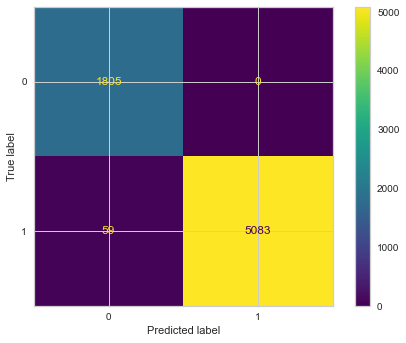

In [110]:
cm_display = ConfusionMatrixDisplay(cm).plot()
print("Precision:   ", tp/(tp+fp))
print("Specificity: ", tn/(fp+tn))
print("Sensitivity: ", tp/(tp+fn))
print("Accuracy:    ", (tp+tn)/(tp+tn+fp+fn))
print("Error rate:  ", (fp+fn)/(tp+tn+fp+fn))

In [ ]:
"""
Here we did 10-fold cross validation and then created another confusion matrix which ended up being much more accurate with 99.2%. Specifity and 
precision were both 100% and sensitivity was 98.9%. The error rate was very low at only 0.0084. This is quite an improvement from the previous 
logistic model and much better when using 10-fold cross validation. 
"""

In [111]:
#ROC curve for the validation data 
y_score = LR_search.predict_proba(X_test.iloc[:,1:10])[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score)

#### ROC curve

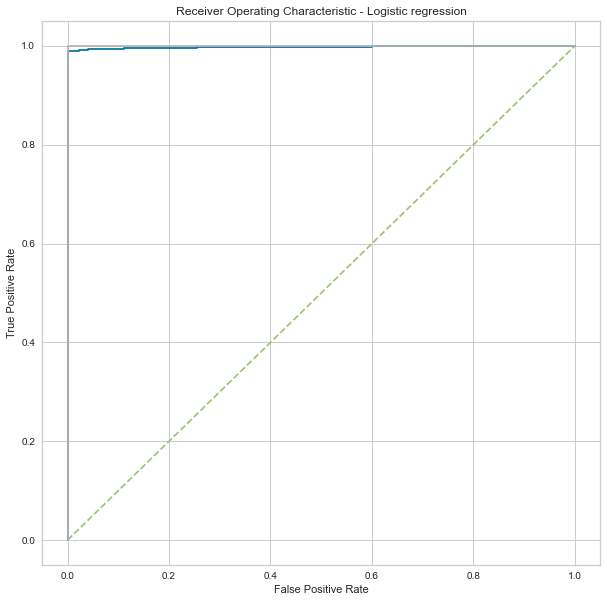

In [112]:
#plot ROC curve 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
"""
Above is a plot of the ROC curve which shows the false posive and true positive rates. There is not much room for improvement with the
accurcacy being 99%. You can see the accuracy at the top of the plot with the blue line.
"""

### Linear Discriminant Analysis

In [113]:
# the training process 
sklearn_lda = LDA(n_components=1) #creating a LDA object
lda = sklearn_lda.fit(X_train.iloc[:,1:10], y_train) #learning the projection matrix
X_lda = lda.transform(X_train.iloc[:,1:10]) #using the model to project X 
X_labels_lda = lda.predict(X_train.iloc[:,1:10]) #gives you the predicted label for each sample
X_prob_lda = lda.predict_proba(X_train.iloc[:,1:10]) #the probability of each sample to belong to each class

In [114]:
# testing step 
X_validation_labels_lda =lda.predict(X_validation.iloc[:,1:10])
X_validation_prob_lda = lda.predict_proba(X_validation.iloc[:,1:10]) 
print(X_validation_prob_lda)

[[4.59501167e-03 9.95404988e-01]
 [7.74964961e-02 9.22503504e-01]
 [2.43057276e-04 9.99756943e-01]
 ...
 [8.34060419e-02 9.16593958e-01]
 [7.89782937e-01 2.10217063e-01]
 [3.28816206e-03 9.96711838e-01]]


#### Confusion matrix for LDA

In [115]:
threshold=0.5
confusion_matrix(y_validation.iloc[:,0],X_validation_prob_lda[:,1]>=threshold)

array([[2680,  596],
       [ 351, 8877]], dtype=int64)

#### Accuracy for LDA

In [116]:
threshold=0.5
np.mean(y_validation.iloc[:,0]==(X_validation_prob_lda[:,1]>=threshold))

0.9242642354446577

In [117]:
roc_auc_score(y_validation,X_validation_labels_lda)

0.8900172035737705

#### 10-Cross validation 

In [118]:
model2 = LDA()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model2, X_train2.iloc[:,1:10], y_train2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Max Accuracy: %.3f (%.3f)' % (np.max(scores), np.std(scores)))

Max Accuracy: 0.931 (0.004)


### ROC curve

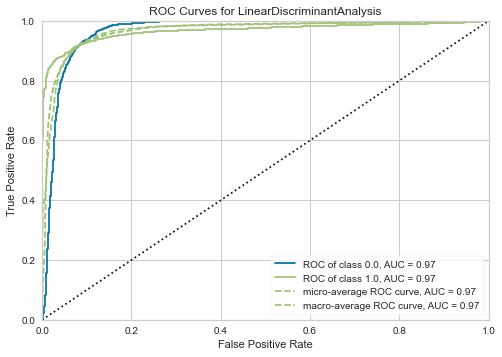

<AxesSubplot:title={'center':'ROC Curves for LinearDiscriminantAnalysis'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [119]:
visualizer = ROCAUC(sklearn_lda)
##set_palette('bold')
visualizer.fit(X_train2.iloc[:,1:10],y_train2)
visualizer.score(X_test.iloc[:,1:10],y_test)
visualizer.show()

### Quadratic Discriminant Analysis 

In [120]:
sklearn_qda = QDA(priors=None,store_covariance=True,reg_param=0.000000) #creating a QDA object
qda = sklearn_qda.fit(X_train.iloc[:,1:10], y_train.iloc[:,0]) #learning the projection matrix
X_labels_qda = qda.predict(X_train.iloc[:,1:10]) #gives you the predicted label for each sample
X_prob_qda = qda.predict_proba(X_train.iloc[:,1:10]) #the probability of each sample to belong to each class

X_validation_labels_qda=qda.predict(X_validation.iloc[:,1:10])
X_validation_prob_qda = qda.predict_proba(X_validation.iloc[:,1:10]) 

In [121]:
X_prob_qda

array([[0.00000000e+00, 1.00000000e+00],
       [9.99999996e-01, 3.94494322e-09],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99326044e-01, 6.73955509e-04]])

#### Confusion matrix for QDA

In [122]:
threshold = 0.5
confusion_matrix(y_validation.iloc[:,0],X_validation_prob_qda[:,1]>=threshold)

array([[3264,   12],
       [  60, 9168]], dtype=int64)

#### Accuracy for QDA

In [123]:
threshold=0.5
np.mean(y_validation.iloc[:,0]==(X_validation_prob_qda[:,1]>=threshold))

0.9942418426103646

In [124]:
roc_auc_score(y_validation,X_validation_labels_qda)

0.9949175228759104

#### 10-Cross validation

In [125]:
model2 = QDA()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model2, X_train2.iloc[:,1:10], y_train2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Max Accuracy: %.3f (%.3f)' % (np.max(scores), np.std(scores)))

Max Accuracy: 0.995 (0.001)


#### ROC curve

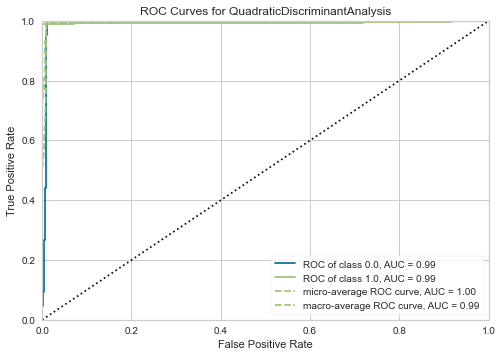

<AxesSubplot:title={'center':'ROC Curves for QuadraticDiscriminantAnalysis'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [126]:
visualizer = ROCAUC(sklearn_qda)
##set_palette('bold')
visualizer.fit(X_train2.iloc[:,1:10],y_train2)
visualizer.score(X_test.iloc[:,1:10],y_test)
visualizer.show()

### Naive Bayes 

In [127]:
NB_class = NB()
NB_class.fit(X_train.iloc[:,1:10], y_train)
X_validation_labels_NB=NB_class.predict(X_validation.iloc[:,1:10])
X_validation_prob_NB = NB_class.predict_proba(X_validation.iloc[:,1:10]) 
print(np.mean(y_validation.iloc[:,0]==X_validation_labels_NB))
#dir(NB_class) # use dir command to check what Naive Bayes classifier has

0.9930422264875239


In [128]:
print(X_validation_prob_NB)

[[0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 ...
 [9.99856099e-01 1.43901153e-04]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]]


#### Confusion matrix for Naive Bayes

In [129]:
threshold=0.5
confusion_matrix(y_validation.iloc[:,0],X_validation_prob_NB[:,1]>=threshold)

array([[3248,   28],
       [  59, 9169]], dtype=int64)

#### Accuracy for Naive Bayes 

In [130]:
threshold=0.5
np.mean(y_validation.iloc[:,0]==(X_validation_prob_NB[:,1]>=threshold))

0.9930422264875239

In [131]:
roc_auc_score(y_validation,X_validation_labels_NB)

0.9925297033554512

#### 10-Cross validation

In [132]:
model3 = NB()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model3, X_train2.iloc[:,1:10], y_train2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Max Accuracy: %.3f (%.3f)' % (np.max(scores), np.std(scores)))

Max Accuracy: 0.994 (0.001)


####  ROC curve

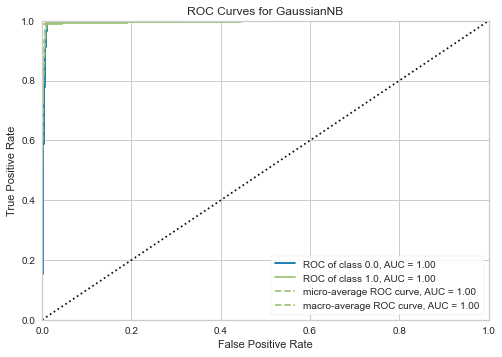

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [133]:
visualizer = ROCAUC(NB_class)
##set_palette('bold')
visualizer.fit(X_train2.iloc[:,1:10],y_train2)
visualizer.score(X_test.iloc[:,1:10],y_test)
visualizer.show()

### K-Nearest Neighbors

In [134]:
neigh = KNN(n_neighbors= 4) # use n_neighbors to change the # of tune the performance of KNN
KNN_fit = neigh.fit(X_train.iloc[:,1:10], y_train) #learning the projection matrix
X_validation_labels_KNN=KNN_fit.predict(X_validation.iloc[:,1:10])
X_validation_prob_KNN = KNN_fit.predict_proba(X_validation.iloc[:,1:10])

#### Confusion matrix for KNN

In [135]:
threshold=0.5
confusion_matrix(y_validation.iloc[:,0],X_validation_prob_KNN[:,1]>=threshold)

array([[3187,   89],
       [ 152, 9076]], dtype=int64)

#### Accuracy for KNN

In [136]:
threshold=0.5
np.mean(y_validation.iloc[:,0]==(X_validation_prob_KNN[:,1]>=threshold))

0.9807261676263596

In [137]:
roc_auc_score(y_validation,X_validation_labels_KNN)

0.9834368961482096

#### 10-Cross validation

In [138]:
model4 = KNN()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model4, X_train2.iloc[:,1:10], y_train2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Max Accuracy: %.3f (%.3f)' % (np.max(scores), np.std(scores)))

Max Accuracy: 0.984 (0.001)


#### ROC curve

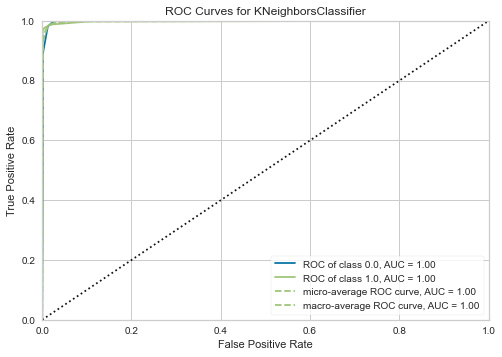

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [139]:
visualizer = ROCAUC(neigh)
##set_palette('bold')
visualizer.fit(X_train2.iloc[:,1:10],y_train2)
visualizer.score(X_test.iloc[:,1:10],y_test)
visualizer.show()

## Lasso

In [140]:
lr = LogisticRegression(C=10000.0, random_state=0,penalty='l1',solver='saga')
lr.fit(X_train.iloc[:,1:10], np.ravel(y_train)) # np.ravel(y_train) is used to get around an error
pred = lr.predict(X_validation.iloc[:,1:10]) 

In [141]:
lr.coef_

array([[-1.04101819e+00,  8.80241323e-01, -2.05103276e-01,
         1.21947598e-01, -4.45329153e-02,  7.40491583e-01,
         4.71802802e+01,  7.38893136e-01, -1.46571097e+00]])

In [142]:
coeff = np.array([-1.04101819e+00,  8.80241323e-01, -2.05103276e-01,
         1.21947598e-01, -4.45329153e-02,  7.40491583e-01,
         4.71802802e+01,  7.38893136e-01, -1.46571097e+00])

In [143]:
print(pd.Series(coeff, X_validation.iloc[:,1:10].columns))

u              -1.041018
g               0.880241
r              -0.205103
i               0.121948
z              -0.044533
spec_obj_ID     0.740492
redshift       47.180280
plate           0.738893
MJD            -1.465711
dtype: float64


#### Confusion matrix for Lasso

In [144]:
threshold=0.5
confusion_matrix(y_validation.iloc[:,0],pred>=threshold)

array([[3275,    1],
       [ 113, 9115]], dtype=int64)

#### Accuracy for Lasso

In [145]:
threshold=0.5
np.mean(y_validation.iloc[:,0]==(pred>=threshold))

0.9908829174664108

#### ROC curve

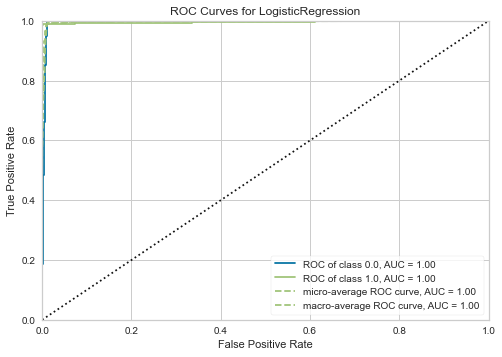

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [146]:
visualizer = ROCAUC(lr)
##set_palette('bold')
visualizer.fit(X_train2.iloc[:,1:10],y_train2)
visualizer.score(X_test.iloc[:,1:10],y_test)
visualizer.show()

#### 10-Cross validation 

In [147]:
logr = LogisticRegressionCV(penalty='l1',solver='saga')
logr.fit(X_train.iloc[:,1:10], y_train)
logr.score(X_validation.iloc[:,1:10],y_validation)

0.9931222008957133

## The Bootstrap

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from IPython.display import display, HTML
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from scipy import stats

In [61]:
strat_train.reset_index(drop=True)

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,Galaxy
0,0.723916,1.713481,1.345933,0.957272,0.756604,1.332172,1.517021,1.332155,1.425050,1
1,1.666306,0.355123,0.070160,-0.004699,-0.035526,-1.417376,0.386295,-1.417397,-1.770657,1
2,-1.190705,-1.478809,-1.561962,-1.577374,-1.541083,-0.725525,-1.062771,-0.725524,-0.664450,0
3,0.808781,0.921637,1.071665,1.478678,2.112286,1.333544,0.428945,1.333562,1.495767,1
4,0.020685,-0.197524,-0.040500,0.025776,0.174451,-0.783236,-0.590407,-0.783210,-0.827771,1
...,...,...,...,...,...,...,...,...,...,...
53887,-1.691125,-1.673783,-1.640947,-1.672514,-1.663159,-1.009729,-0.890371,-1.009730,-1.107831,1
53888,-1.639533,-1.609000,-1.456891,-1.322051,-1.153696,0.953330,-1.062106,0.953331,0.775694,0
53889,1.202379,1.270497,1.082959,0.809738,0.626240,1.053960,1.648152,1.053929,1.327394,1
53890,-1.176535,-1.151560,-1.075752,-1.027358,-0.976234,-1.220761,-0.829689,-1.220774,-1.327837,1


In [71]:
response   = 'Galaxy'
predictors = ['u','g','r','i','z','redshift','spec_obj_ID','plate','MJD']

X_all = sm.add_constant(np.array(strat_train[predictors]))
y_all = np.array(strat_train[response])

## Logistic regression
model_logit = sm.Logit(y_all, X_all).fit(disp=False);    

# Summary
print(model_logit.summary())

statsmodels_est = pd.DataFrame({'coef_sm': model_logit.params, 'SE_sm': model_logit.bse})
display(statsmodels_est)

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                53892
Model:                          Logit   Df Residuals:                    53882
Method:                           MLE   Df Model:                            9
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                     inf
Time:                        19:14:20   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        282.6766     15.010     18.833      0.000     253.258     312.095
x1            -0.3645      0.129     -2.835      0.005      -0.616      -0.113
x2             0.8434      0.175      4.824      0.0

,coef_sm,SE_sm
0,282.676623,15.009652
1,-0.364504,0.128559
2,0.843410,0.174839
3,-0.529827,0.207603
4,0.276830,0.210561
5,0.023556,0.135490
6,269.444031,14.130671
7,-9842.564386,2422.514520
8,9843.501952,2422.501548
9,-0.570598,0.232965


In [ ]:
ols2 = sm.ols('mpg ~ horsepower + horsepower_2', data=auto).fit()
ols2.summary().tables[1]


In [73]:
def boot_fn(strat_train, idx):
    response   = 'Galaxy'
    predictors = ['u','g','r','i','z','redshift','spec_obj_ID','plate','MJD']
    
    X = sm.add_constant(np.array(strat_train[predictors]));
    y = np.array(strat_train[response]) 
       
    # Logistic regression
    model_logit = sm.Logit(y, X).fit(disp=False);  
    return model_logit.params;

In [74]:
def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

def standard_deviation(X):
    """Compute deviation error for jth element in matrix X
    equivalent to np.std(X, axis=0)"""
    X_bar = np.mean(X, axis=0)
    SE = np.sqrt((np.sum(np.square(X - X_bar), axis=0)) / (len(X)))
    return SE

B = 5000
coef_preds    = boot(boot_fn,strat_train, samples=B)
coef_pred     = np.mean(coef_preds, axis=0)
standard_errs = standard_deviation(coef_preds)

bootstrap_est = pd.DataFrame({'coef_boot': coef_pred, 'SE_boot': standard_errs})
display(bootstrap_est)

KeyboardInterrupt: 